# PyMixmod - démarrage rapide

## Installer PyMixmod

**PyMixmod** est disponible en environnement **Linux 64 bits** et **MacOSX** et sera bientôt disponible sous **Windows**.

Il est compatible avec **Python 2.7.x** et **Python 3.6.x**

### Installation en environnement **Linux 64 bits**

Si la suite **Anaconda** est déjà installée sur votre ordinateur, vous pouvez passer directement à l'étape **3**, sinon :

1. Téléchargez **Anaconda**  pour **Linux 64 bits** à partir du site http://continuum.io/downloads (vous pouvez opter pour **Python 2.7** ou pour **Python 3.6**).

2. Installez **Anaconda** en suivant les instructions fournies sur le site de la distribution. 

    > **Quelques précisions** concernant l'installation d'*Anaconda* (nous appellerons par la suite <**CONDA_PATH**> le répertoire de cette installation):
    >    * L'emplacement de <**CONDA_PATH**> est libre au moment de l'installation (à condition de disposer des droits suffisants) la valeur par défaut, proposée par l'installeur *Anaconda* interactif, étant :
    
    >        * **\$HOME/anaconda2** si vous avez opté pour **Python 2.7**
    >        * **\$HOME/anaconda3** si vous avez opté pour **Python 3.4**
    >    * **Anaconda**  installe dans **<*CONDA_PATH*>/bin** plusieurs exécutables dont **conda** et **python**, qui seront évoqués par la suite. 
    >    * L'installeur interactif propose à la dernière étape de l'installation le choix de rajouter  **<*CONDA_PATH*>/bin** à la variable **PATH** de son environnement d'exécution 
    >> "Do you wish the installer to prepend the Anaconda install location to PATH in your /home/poli/.bashrc ? [yes|no]").

    > Si on a répondu "no" à cette question (et on peut avoir des bonnes raisons pour le faire) il faudra s'assurer par d'autres moyens (chemins absoluts, aliases...) que les exécutables utilisés pour réaliser les opérations qui suivent (**conda**, **python** etc.) sont bien ceux qui se trouvent dans **<*CONDA_PATH*>/bin**

3. Téléchargez le paquet **PyMixmod** correspondant à la version de **Python** correspondant à votre installation **Anaconda** :
    * *pymixmod-0.1-py27_0.tar.bz2* pour *Linux et Python 2.7*
    * *pymixmod-0.1-py36_0.tar.bz2* pour *Linux et Python 3.6* 

4. Installer le paquet téléchargé précédemment avec la commande **conda**, présente dans la distribution **Anaconda**. 
    ```
    conda install pymixmod-0.1-pyXX_0.tar.bz2 # XX=27 ou 36
    ```
    **NB:** Si le chemin <*CONDA_PATH*>/bin n'est pas présent dans votre environnement vous devez exécuter, par exemple:
    ```
    $HOME/anaconda/bin/conda install pymixmod-0.1-py27_0.tar.bz2
    ```


### Installation en environnement **MacOSX**

Suivre les mêmes étapes que pour l'installation **Linux** en utilisant à l'étape **3** les paquets destinés à l'environnement **MacOSX**:

* *OSX_pymixmod-0.1-py27_0.tar.bz2* pour *MacOSX et Python 2.7*
* *OSX_pymixmod-0.1-py36_0.tar.bz2* pour *MacOSX et Python 3.6*

### Installation en environnement **Windows**

Cette version sera disponible prochainement

## Utilisation de PyMixmod

### Considérations communes à tous les exemples

##### Exécutables **python** à utiliser

**NB:** Après avoir installé avec succès le paquet **PyMixmod** vous avez accès:

* à la documentation de l'API à l'emplacement **<*CONDA_PATH*>/share/pymixmod/doc/html/index.html** (à ouvrir avec votre navigateur habituel)
* à quelques exemples à l'emplacement **<*CONDA_PATH*>/share/pymixmod/examples/**

L'exécution de ces exemples, ainsi que de ceux qui suivent, suppose l'utilisation des exécutables **python** ou **ipython** faisant partie de votre installation **Anaconda** (et **non pas** ceux fournis avec votre distribution *Linux* ou *MacOS*). Par exemple, si vous avez installé **Anaconda** dans l'emplacement par défaut, vous devez utiliser:
```
$HOME/anaconda/bin/python
```

si vous avez opté pour *Python 2.7* ou:
```
$HOME/anaconda3/bin/python
```

si vous avez choisi *Python 3.6*.

#### Portabilité *Python 2.7* - *Python 3.6*

Les exemples suivants fonctionnent tels quels aussi bien en environnement **Python 2.7** qu'en **Python 3.6**.

Pour assurer cette portabilité, les importations suivantes en début de chaque script ou session *Python* sont préconisées:

In [19]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

#### Utilisation de **Pandas**

La manipulation des données en *Python* est grandement facilitée par l'utilisation de la bibliothèque *Pandas* (voir http://pandas.pydata.org/ pour plus de détails).
*Pandas* permet, entre autres, le chargement des fichiers en format **.csv** sous forme d'objets **DataFrame**, compatibles avec *PyMixmod* :

In [ ]:
import pandas as pnd
data = pnd.read_csv(filepath_or_buffer='/path/to/datafile.csv',sep=',',header=False)

#### Importation de *PyMixmod*

*PyMixmod* comporte un module *Python* unique, appelé **mixmod** qu'on va importer :

In [1]:
import mixmod

En complément, pour faciliter l'écriture plus compacte des constantes globales du module, on va préférer importer à part :

In [2]:
from mixmod import gm

### Exemple : Classification avec des données quantitatives

#### Importation des modules, chargement des données:

In [4]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import pandas as pnd
import mixmod
from mixmod import gm # gm contains global constants (enum items etc.)
# iris.train se trouve dans <CONDA_PATH>/share/pymixmod/data/
data = pnd.read_csv(filepath_or_buffer='../../data/iris.train',sep=',')
data = data.ix[:,0:4] # afin d'exclure la dernière colonne, contenant des labels

#### Classification proprement dite, affichage du résultat:

In [5]:
cluster = mixmod.cluster(data,[2,3,4], gm.QUANTITATIVE)
print(cluster.summary())

****************************************
*** INPUT:
****************************************
* nbCluster = 2 3 4
* criterion = BIC
****************************************
*** MIXMOD Models:
* list = b'Gaussian_pk_Lk_C'
****************************************
* data (limited to a 10x10 matrix) =
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
5  5.4  3.9  1.7  0.4
6  4.6  3.4  1.4  0.3
7  5.0  3.4  1.5  0.2
8  4.4  2.9  1.4  0.2
9  4.9  3.1  1.5  0.1
* ... ...
****************************************
*** MIXMOD Strategy:
* number of tries      = 1
* algorithm            = EM
* number of iterations = 200
* epsilon              = 0.001
*** Initialization strategy:
* algorithm            = SMALL_EM
* number of tries      = 10
* number of iterations = 5
* epsilon              = 0.001
* seed                 = NULL
****************************************


****************************************
*** BEST MODEL OUTPUT:
*** Accor

#### Représentation graphique avec la méthode *plot()*

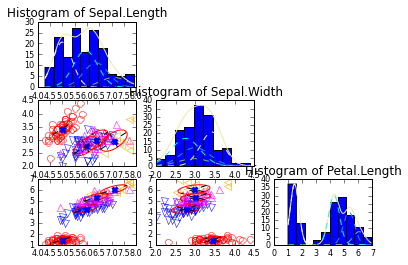

In [6]:
%matplotlib inline
cluster.plot(y=["Sepal.Length","Sepal.Width","Petal.Length"]);

#### Affichage d'histogrammes

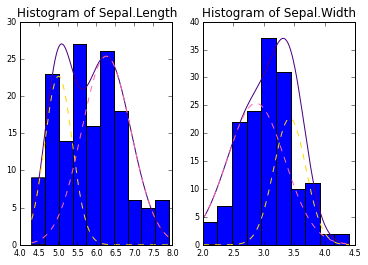

In [34]:
cluster.hist(variables=["Sepal.Length","Sepal.Width"]);

### Exemple : Classification avec des données qualitatives

#### Importation des modules, chargement des données:

In [8]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import pandas as pnd
import mixmod
from mixmod import gm # gm contains global constants (enum items etc.)
# car.csv se trouve dans <CONDA_PATH>/share/pymixmod/data/
data = pnd.read_csv(filepath_or_buffer='../../data/car.csv',sep=',',header=False)

#### Classification proprement dite, affichage du résultat:

In [26]:
cluster = mixmod.cluster(data, 7, gm.QUALITATIVE)
print(cluster.summary())

****************************************
*** INPUT:
****************************************
* nbCluster = 7
* criterion = BIC
****************************************
*** MIXMOD Models:
* list = Binary_pk_Ekjh
****************************************
* data (limited to a 10x10 matrix) =
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc
5  vhigh  vhigh  2  2    med  high  unacc
6  vhigh  vhigh  2  2    big   low  unacc
7  vhigh  vhigh  2  2    big   med  unacc
8  vhigh  vhigh  2  2    big  high  unacc
9  vhigh  vhigh  2  4  small   low  unacc
* ... ...
****************************************
*** MIXMOD Strategy:
* number of tries      = 1
* algorithm            = EM
* number of iterations = 200
* epsilon              = 0.001
*** Initialization strategy:
* algorithm            = SMALL_EM
* number of tries      = 10
* number of i

#### Représentation graphique du résultat avec la méthode plot()

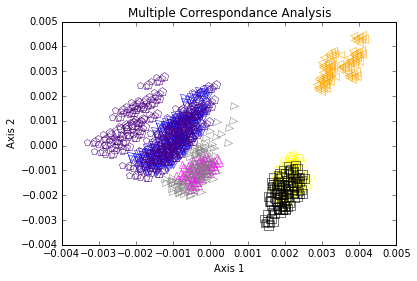

In [28]:
cluster.plot();